## Project Machine Learning - Kelas LD01 <br>

Mikhael Adiputra - 2301957572 <br>
Bobby Ravel Moreno - 2301924933 <br>
Ryan Razaan Gunawan - 2301878290

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import scipy.optimize as opt
%matplotlib inline

# Load Dataset

In [2]:
dataset = pd.read_csv('heart.csv', sep = ",")
dataset.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


dataset terdiri dari 14 kolom (13 features dan 1 target) dengan jumlah data 228 baris

# Data Cleaning

In [3]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# Checking for missing values
def visualize_null(dataset):
    column_name = list(dataset.keys())
    values      = list(dataset.isnull().sum())

    fig         = plt.figure(figsize = (20, 5))

    # creating the bar plot
    plt.bar(column_name, values, color ='maroon', width = 0.4)

    plt.ylabel("Missing Values")
    plt.title("Column Missing Values")
    plt.show()

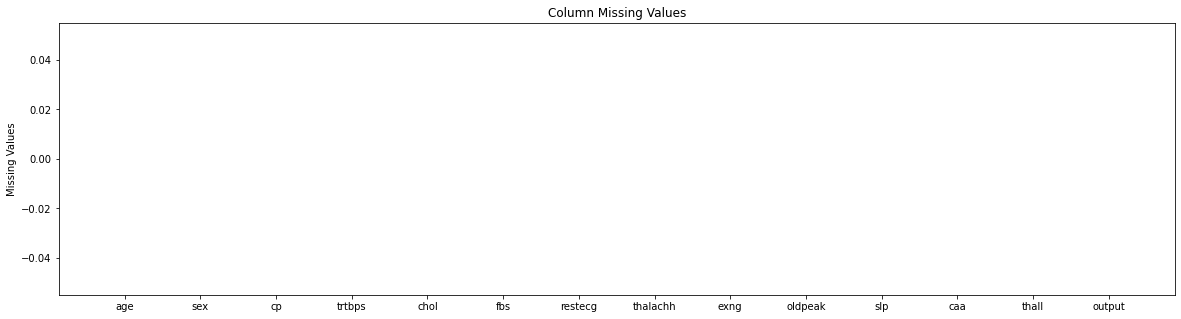

In [5]:
visualize_null(dataset)

Karena tidak ditemukan Null/NaN dalam dataset maka kita tidak perlu melakukan imputation.

# Data Correlation

<!-- cp, thalachh, slp, restecg -->

# Handling Outlier and Dataset Normalization

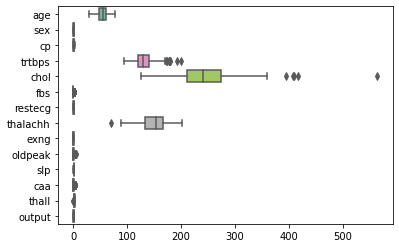

In [6]:
# Checking for outliers
import seaborn as sns
outliers = sns.boxplot(data=dataset, orient="h", palette="Set2")

Berdasarkan grafik diatas, kita menemukan bahwa dataset kita masih penuh dengan outlier. Outlier bisa dilihat pada grafik diatas berupa titik-titik yang berada diluar range candlestick.

In [7]:
# Removing outliers using IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trtbps      20.0
chol        63.5
fbs          0.0
restecg      1.0
thalachh    32.5
exng         1.0
oldpeak      1.6
slp          1.0
caa          1.0
thall        1.0
output       1.0
dtype: float64


Seperti yang sudah dijelaskan sebelumnya, dataset kita masih memiliki banyak outlier terutama data dalam kolom chol (cholestrol).<br> <br>

Metode IQR digunakan untuk menghilangkan outlier dari dalam dataset. <br>
Q1 adalah batas bawah dari keseluruhan data point dalam suatu kolom. <br>
Q3 adalah batas atas dari keseluruhan data point dalam suatu kolom. <br>
IQR adalah range batasan data yang dianggap bukan termasuk outlier, nilai IQR ini nantinya akan digunakan nantinya untuk me-remove data outlier.

In [8]:
# Remove Outlier from the dataset
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset.shape

(228, 14)

Diatas adalah rumus umum dalam menghilangkan outlier. Berdasarkan rumus diatas maka seluruh data yang berada di bawah batas Q1 dan berada di atas batas Q3 akan dihilangkan.

In [9]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


# Min Max Normalization
Setelah outliers dalam data dihilangkan, kita dapat melakukan normalisasi data menggunakan skala MinMax untuk memudahkan proses training. 

In [10]:
from sklearn.preprocessing import MinMaxScaler

keys = dataset.keys()

scaler = MinMaxScaler()
scaler.fit(dataset)
dataset = scaler.transform(dataset)
dataset = pd.DataFrame(dataset, columns = keys)

In [11]:
finalized_dataset = dataset[["cp", "thalachh", "slp", "output"]]

In [12]:
finalized_dataset.head()

,cp,thalachh,slp,output
0,0.666667,0.868421,0.0,1.0
1,0.333333,0.736842,1.0,1.0
2,0.333333,0.789474,1.0,1.0
3,0.000000,0.657895,1.0,1.0
4,0.000000,0.526316,0.5,1.0


In [13]:
correlations = dataset.corr()

print(correlations)

               age       sex        cp    trtbps      chol  fbs   restecg  \
age       1.000000 -0.088839 -0.078448  0.266698  0.172527  NaN -0.082927   
sex      -0.088839  1.000000 -0.121648 -0.001433 -0.093058  NaN -0.116956   
cp       -0.078448 -0.121648  1.000000  0.083476 -0.047258  NaN  0.076362   
trtbps    0.266698 -0.001433  0.083476  1.000000  0.126974  NaN -0.110594   
chol      0.172527 -0.093058 -0.047258  0.126974  1.000000  NaN -0.100622   
fbs            NaN       NaN       NaN       NaN       NaN  NaN       NaN   
restecg  -0.082927 -0.116956  0.076362 -0.110594 -0.100622  NaN  1.000000   
thalachh -0.413016 -0.086734  0.277964 -0.026792 -0.016899  NaN  0.033100   
exng      0.123981  0.208950 -0.351256 -0.019909  0.019446  NaN -0.063645   
oldpeak   0.219390  0.178690 -0.108435  0.131845 -0.030397  NaN -0.081251   
slp      -0.161019 -0.009104  0.101887 -0.026418  0.066865  NaN  0.094807   
caa       0.391099  0.099091 -0.196373  0.027864  0.108537  NaN -0.082538   

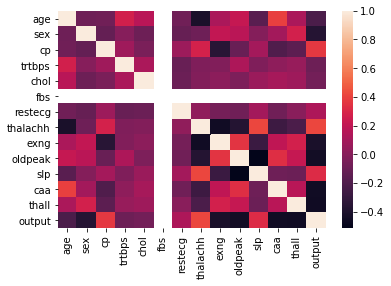

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations)
plt.show()

# Data Preparation

In [15]:
# Split dataset 80% for training and 20% for testing

train_dataset = finalized_dataset.sample(frac=0.8,random_state=1) 
test_dataset  = finalized_dataset.drop(train_dataset.index)


# Prepare features and labels for train and test dataset
train_x = train_dataset.loc[:,train_dataset.columns != "output"] 
test_x = test_dataset.loc[:,test_dataset.columns != "output"]

train_y = train_dataset['output'].values
test_y = test_dataset['output'].values

Kita pecah data ke dalam training (80% dari data) dan testing (20% dari data). Setelah itu kita pisahkan juga kolom yang merupakan features dan kolom target. Hal ini dilakukan agar data testing menggunakan data yang belum dikenal sama sekali oleh model.

In [16]:
train_x.head(10)

,cp,thalachh,slp
39,0.666667,0.596491,1.0
169,0.000000,0.456140,0.5
93,0.000000,0.824561,1.0
62,0.666667,0.675439,0.5
198,0.000000,0.061404,0.5
114,0.666667,0.245614,0.5
38,0.666667,0.807018,1.0
123,0.666667,0.561404,0.5
106,0.333333,0.657895,1.0
89,1.000000,0.649123,0.5


In [17]:
train_y

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

# Logistic Regression Algorithm

In [18]:
# Activation function
def sigmoid(theta, X):
    return 1 / (1 + np.exp((-np.matmul(X,theta.transpose()))))

Kita menggunakan fungsi aktivasi sigmoid untuk training model dikarenakan kita hanya melakukan klasifikasi binary.

In [19]:
def calculate_cost(theta, X, y, r_lambda): 
    m = X.shape[0]
    h = sigmoid(theta, X)
    cost = (1/m)*(-y*np.log(h)-(1-y)*np.log(1-h)).sum() + (r_lambda / (2*m))*np.square(theta).sum()
    cost -= (r_lambda / (2*m)) * theta[0]**2 
    return cost

Fungsi diatas digunakan untuk melakukan perhitungan terhadap loss(cost) yang merupakan perbedaan nilai dari target asli dengan prediksi.

In [20]:
def calculate_grad(theta, X, y, r_lambda):
    m = X.shape[0]
    h = sigmoid(theta, X)
    grad = np.matmul(X.transpose(),h - y) 
    grad += (r_lambda/m) * theta
    grad[0] -= (r_lambda/m) * theta[0] 
    return grad

Untuk algoritma training kita akan menggunakan gradient descent untuk mengupdate nilai weight dan bias atau bisa dibilang gradient descent digunakan untuk meminimalkan loss (cost).

In [21]:
# M = len dataset
# n = count of weight
# y = label
# X = dataset Features
def logistic_regression(theta, X, y, lr, epoch, r_lambda):
    m = X.shape[0]
    costs_function = []
    test_cost_function = []
    
    for i in range(epoch):
        costs_function.append(calculate_cost(theta, X, y, r_lambda))
        theta -= lr * (1/m)*calculate_grad(theta, X ,y, r_lambda)
        x_graph      = np.arange(0,epoch,1);      
    
    return theta, costs_function,x_graph

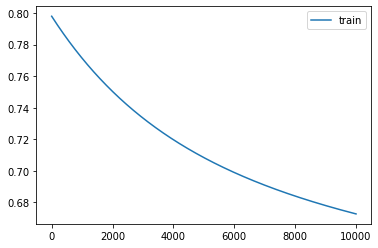

In [22]:
theta = np.random.rand(train_x.shape[1]) 
theta, cost_function,  x_graph = logistic_regression(theta , train_x.values, train_y, 0.001, 10000, 100)

plt.plot(x_graph, cost_function,  label ='train') 
plt.legend()

Grafik diatas merupakan visualisasi dari perubahan nilai loss saat proses training. <br>
Sumbu-x menyatakan jumlah epoch atau iterasi. <br>
Sumbu-y menyatakan nilai loss(cost). <br>

# Results and Prediction

In [23]:
def predict(theta, dataset, threshold):
    prediction = sigmoid(theta, dataset)
    y_predicted = (prediction>=threshold).astype(int)
    return y_predicted

In [24]:
from sklearn.metrics import accuracy_score

y_pred = predict(theta, test_x.values, 0.5)
accuracy = accuracy_score(test_y, y_pred)
print(accuracy)

0.5652173913043478


Untuk evaluasi hasil kita menggunakan metode accuracy_score dari sklearn.metrics. <br>
Kita dapati hasil akurasi kita menggunakan test data sebesar 82%. <br>

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, y_pred)

array([[ 0, 20],
       [ 0, 26]], dtype=int64)

Berdasarkan confusion matrix diatas kita menemukan bahwa prediksi testing kita mendapat 38 jawaban benar dari 46 kemungkinan. (13 True Positive dan 25 True Negative)

# Library Evaluation

Sekarang kita akan membandingkan hasil kita dengan model logistic regression yang telah disediakan oleh library scikitlearn.

In [26]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train_x, train_y)

In [27]:
y_pred_ml = clf.predict(test_x)
accuracy_ml = accuracy_score(test_y, y_pred_ml)
print(accuracy_ml)

0.7391304347826086


Berdasarkan nilai di atas, kita dapat melihat bahwa model library memiliki skor akurasi sebesar 89%. Berdasarkan hasil di atas, kita dapat menyimpulkan bahwa menggunakan model library adalah pilihan yang lebih baik daripada menggunakan algoritma yang harus dibangun dari awal. Selain mengurangi waktu pemrosesan, penggunaan memori juga lebih efisien. Adapun perbedaan akurasi itu sendiri dapat dipengaruhi oleh banyak faktor. Salah satu faktor yang dapat mempengaruhi perbedaan akurasi ini adalah penggunaan fungsi aktivasi yang lebih sesuai.  

In [28]:
confusion_matrix(test_y, y_pred_ml)

array([[11,  9],
       [ 3, 23]], dtype=int64)

Berdasarkan confusion matrix diatas kita menemukan bahwa prediksi testing library mendapat 41 jawaban benar dari 46 kemungkinan. (15 True Positive dan 26 True Negative)